In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load of final dataset

In [3]:
input_file = '../data/final_dataset.csv'
final_dataset = pd.read_csv(input_file)

# Functions used for analysis

In [4]:
def columnDescription(dataframe):
    for column in dataframe:
        print("Column name: " + str(column))
        print("Number of values: " +str(getattr(dataframe, column).shape[0]))
        print("Number of unique values: " + str(getattr(dataframe,str(column)).unique().__len__()))
        print("Number of NA values: " + str(getattr(dataframe, column).shape[0] - getattr(dataframe, column).dropna().shape[0]))
        print("")

In [5]:
def __birthdate_deathdate_to_date__(dataframe, column):
    dataframe[column] = pd.to_datetime(dataframe[column])

    return dataframe

In [6]:
def __fix_format_height_meters__(dataframe, column):
    dataframe[column] = dataframe[column].astype('string')
    dataframe[column] = dataframe[column].str.replace('.','')
    

In [7]:
def __fix_values_height_meters__(dataframe, column):
    dataframe[column] = dataframe.apply(lambda x: x + '0' if x is not None or len(x) == 2 else '')
    

In [8]:
def __identify_outliers__(column):
    quantil25 = column.quantile(0.25)
    quantil75 = column.quantile(0.75)

    interquantilrange = quantil75 - quantil25

    lower = quantil25 - 1.5 * interquantilrange
    upper = quantil75 + 1.5 * interquantilrange

    return column[(column < lower) | (column > upper)]

# Exploratory data analysis

In [9]:
final_dataset.head(5)

,id_person,name,birth,death,weight_kg,height_meters,birth_validation,death_validation,nationality,place_of_birth
0,m.02vrkzq,Tom Packs,1894-08-15,1964-10-22,NaN,NaN,NaN,NaN,United States of America,"Poulithra, Arcadia"
1,m.04lfmyt,Julia Smith,1905-01-25,1989-04-18,NaN,NaN,NaN,NaN,United States of America,Denton
2,m.0zgp97z,Bodine Boling,1982-08-16,2082-07-22,NaN,NaN,NaN,Death date could not be valid..,United States of America,Denton
3,m.0zdb3vh,Scotty Young,1992-02-27,2092-02-02,95.0,1.88,NaN,Death date could not be valid..,United States of America,Denton
4,m.0zf9x5_,Andrew Hamilton,1991-05-29,2091-05-04,100.0,1.83,NaN,Death date could not be valid..,United States of America,Denton


In [10]:
final_dataset.tail(5)

,id_person,name,birth,death,weight_kg,height_meters,birth_validation,death_validation,nationality,place_of_birth
768630,m.09hd28,Vince Papale,1946-02-09,2046-01-15,88.5,1.88,NaN,Death date could not be valid..,United States of America,Chester
768631,m.04_gxj,Joey Stefano,1968-01-01,1994-11-26,NaN,1.77,NaN,NaN,United States of America,Chester
768632,m.0w4ysg3,Taariq Cephas,1993-06-30,2093-06-05,68.0,1.78,NaN,Death date could not be valid..,United States of America,Chester
768633,m.0dqj5y,Sylvanus Morley,1883-06-07,1948-09-02,NaN,NaN,NaN,NaN,United States of America,Chester
768634,m.0yjzq3p,Lonnie Richardson,1992-09-24,2092-08-30,85.0,1.80,NaN,Death date could not be valid..,United States of America,Chester


In [11]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768635 entries, 0 to 768634
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_person         768635 non-null  object 
 1   name              768635 non-null  object 
 2   birth             728270 non-null  object 
 3   death             728270 non-null  object 
 4   weight_kg         105996 non-null  float64
 5   height_meters     193749 non-null  float64
 6   birth_validation  42286 non-null   object 
 7   death_validation  545079 non-null  object 
 8   nationality       768635 non-null  object 
 9   place_of_birth    768635 non-null  object 
dtypes: float64(2), object(8)
memory usage: 58.6+ MB


In [12]:
final_dataset.describe()

,weight_kg,height_meters
count,105996.000000,193749.000000
mean,84.005812,1.814626
std,19.542353,1.339395
min,1.050000,0.000000
25%,72.000000,1.750000
50%,81.460000,1.800000
75%,93.000000,1.860000
max,397.000000,188.000000


In [13]:
final_dataset.shape[0] # number of rows

768635

In [14]:
print(final_dataset.shape[1]) # number of columns
print(final_dataset.columns) # name of columns

10
Index(['id_person', 'name', 'birth', 'death', 'weight_kg', 'height_meters',
       'birth_validation', 'death_validation', 'nationality',
       'place_of_birth'],
      dtype='object')


In [15]:
columnDescription(final_dataset)

Column name: id_person
Number of values: 768635
Number of unique values: 708764
Number of NA values: 0

Column name: name
Number of values: 768635
Number of unique values: 674509
Number of NA values: 0

Column name: birth
Number of values: 768635
Number of unique values: 78826
Number of NA values: 40365

Column name: death
Number of values: 768635
Number of unique values: 91337
Number of NA values: 40365

Column name: weight_kg
Number of values: 768635
Number of unique values: 1347
Number of NA values: 662639

Column name: height_meters
Number of values: 768635
Number of unique values: 183
Number of NA values: 574886

Column name: birth_validation
Number of values: 768635
Number of unique values: 2
Number of NA values: 726349

Column name: death_validation
Number of values: 768635
Number of unique values: 2
Number of NA values: 223556

Column name: nationality
Number of values: 768635
Number of unique values: 578
Number of NA values: 0

Column name: place_of_birth
Number of values: 768

<Figure size 1000x600 with 0 Axes>

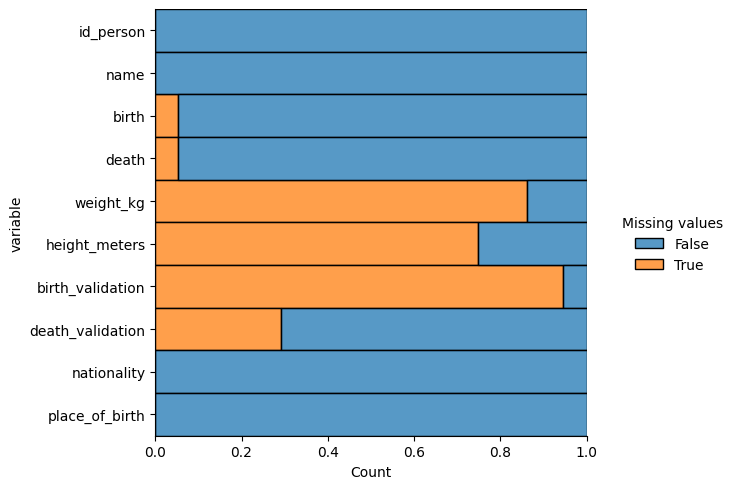

In [16]:
plt.figure(figsize=(10,6))
sns.displot(
    data=final_dataset.isna().melt(value_name="Missing values"),
    y="variable",
    hue="Missing values",
    multiple="fill",
    aspect=1.25
)

<AxesSubplot:ylabel='weight_kg'>

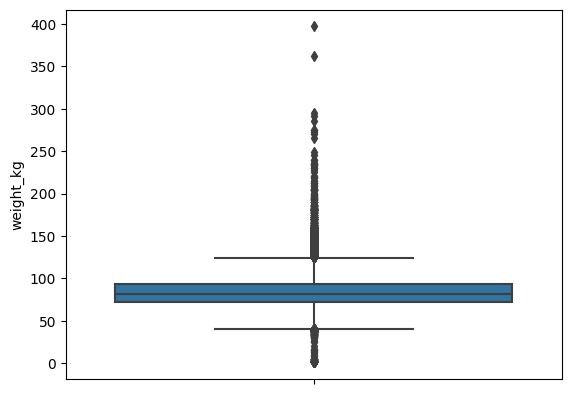

In [17]:
sns.boxplot(y = final_dataset.weight_kg)

<AxesSubplot:ylabel='height_meters'>

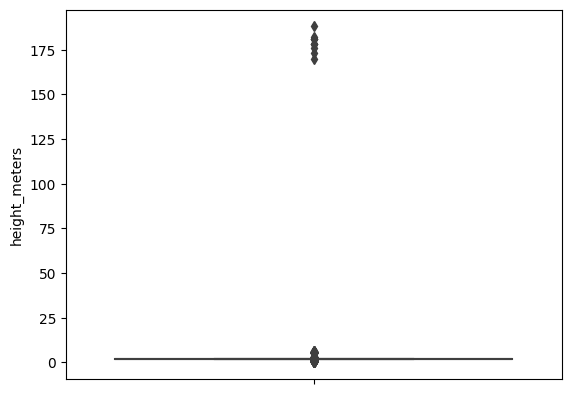

In [20]:
sns.boxplot(y = final_dataset.height_meters)

(Text(0.5, 0, ''), Text(0, 0.5, ''))

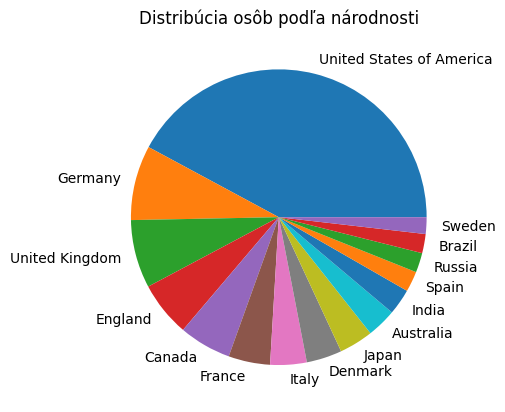

In [34]:
final_dataset["nationality"].value_counts()[:15].plot(kind = "pie", title = "Distribúcia osôb podľa národnosti")
plt.xlabel(''), plt.ylabel('')

In [25]:
table = pd.pivot_table(final_dataset, aggfunc = "size" , columns = "nationality")

In [29]:
final_dataset["nationality"].value_counts()[:5]

United States of America    224944
Germany                      43630
United Kingdom               39835
England                      32103
Canada                       30516
Name: nationality, dtype: int64

(Text(0.5, 0, ''), Text(0, 0.5, ''))

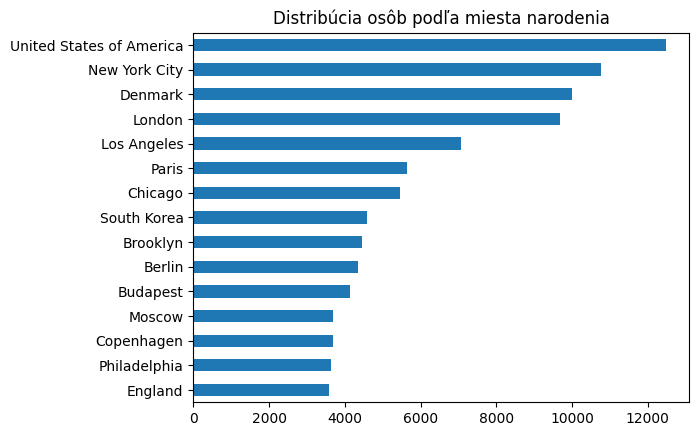

In [45]:
final_dataset["place_of_birth"].value_counts()[:15].sort_values().plot(kind = "barh", title = "Distribúcia osôb podľa miesta narodenia")
plt.xlabel(''), plt.ylabel('')

In [39]:
df

,index,place_of_birth
0,United States of America,12473
1,New York City,10763
2,Denmark,10003
3,London,9671
4,Los Angeles,7068
5,Paris,5644
6,Chicago,5466
7,South Korea,4588
8,Brooklyn,4448
9,Berlin,4336
